[1] 19

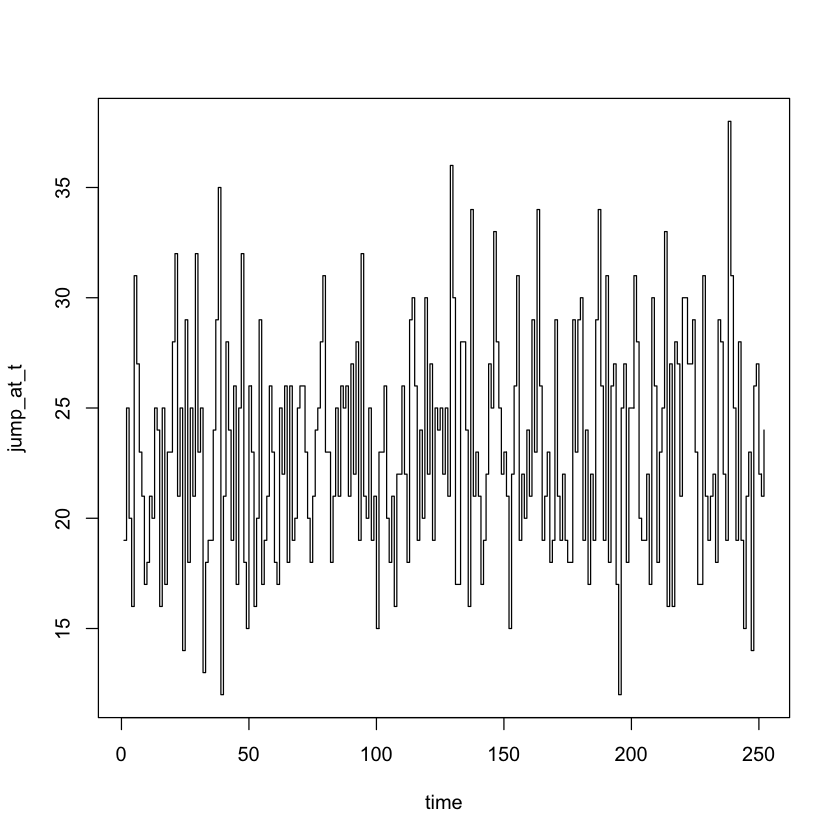

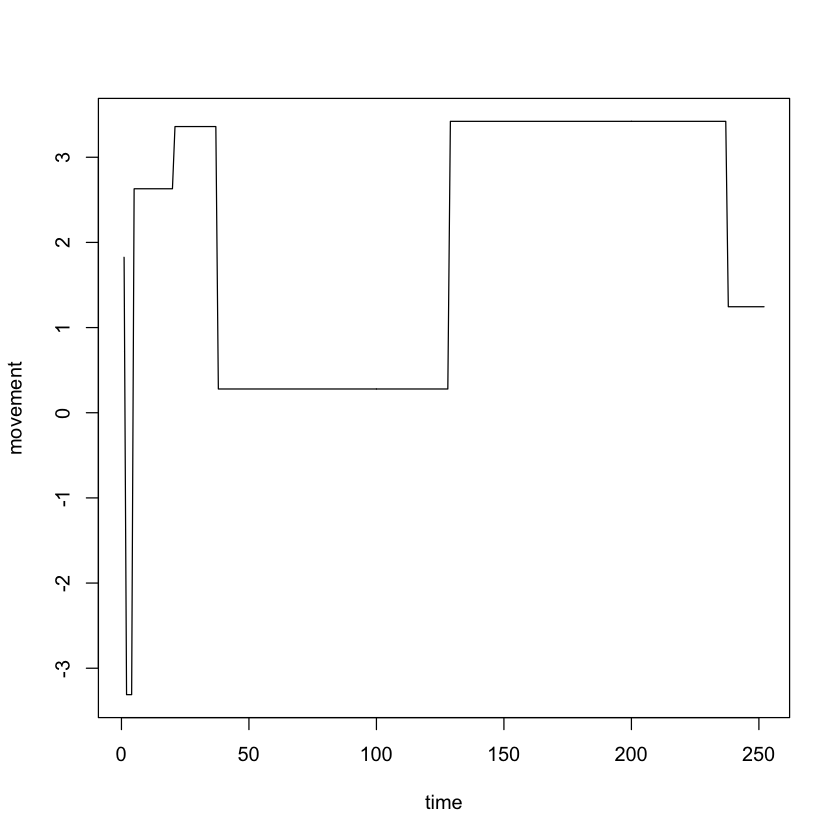

In [86]:
time = seq(1,252)
#lambda avg(stock)
lambda <- 23
jump_at_t = rep(0, 252)
for (t in time){
    jump_at_t[t] <- rpois(1, lambda) # removed t
}
plot(x = time, y = jump_at_t, type = 's')
movement <- rep(0,252)

max <- -1
for (t in time) {
    if (jump_at_t[t] > max) {
        x <- rnorm(jump_at_t[t])
        movement[t] <- sum(x) 
        max <- jump_at_t[t]
    }
    else {
        movement[t] <- movement[t-1]
    }
}
#beta mean
beta <- .25
#movement <- movement + beta * sqrt(time) + 750 # squared time and added 750
plot(x = time, y  = movement, type = 'l')
#lines(x = time, y = cumsum(movement)/1:length(movement), col = 'red')

[1] 0.02517907

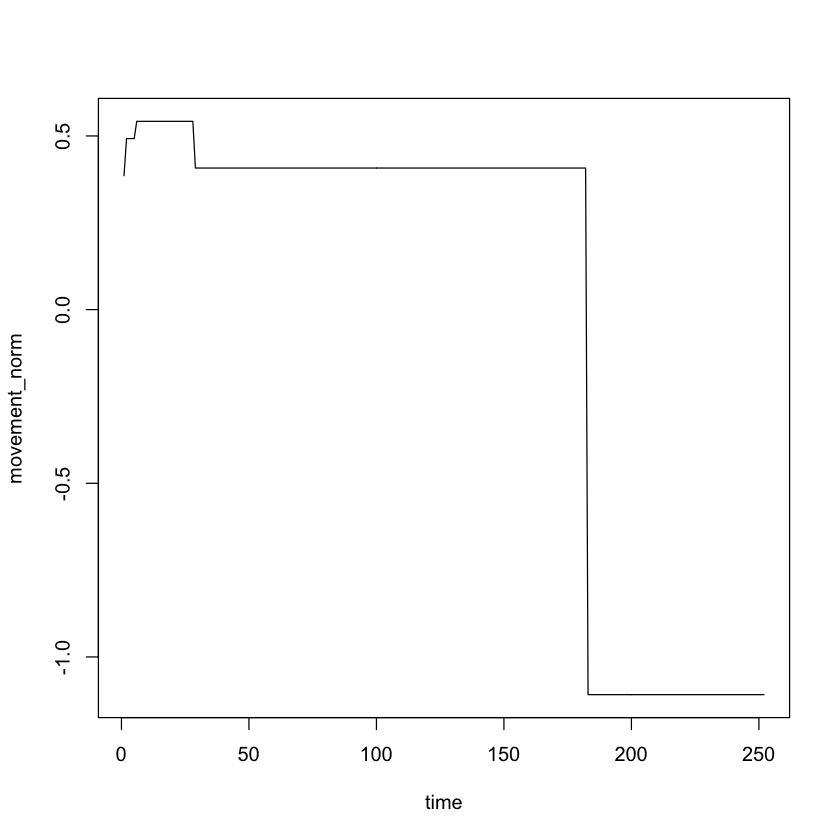

In [85]:
sd(movement_norm)/(sqrt(length(movement_norm)))
movement_norm <- (movement - mean(movement))/2.5
time <- seq(1,252)
plot(x = time, movement_norm, type = 'l')

In [99]:
mm <- function(alpha, beta, time=seq(1,252)) {
    jump_at_t = rep(0, 252)
    for (t in time){
        jump_at_t[t] <- rpois(1, alpha) # removed t
    }
    plot(x = time, y = jump_at_t, type = 's')
    
    movement <- rep(0,252)

    counter <- 1
    for (jump in jump_at_t) {
        x <- rnorm(jump)
        movement[counter] <- sum(x)
        counter <- counter + 1
    }
    movement <- movement + beta * time # squared time and added 750
}

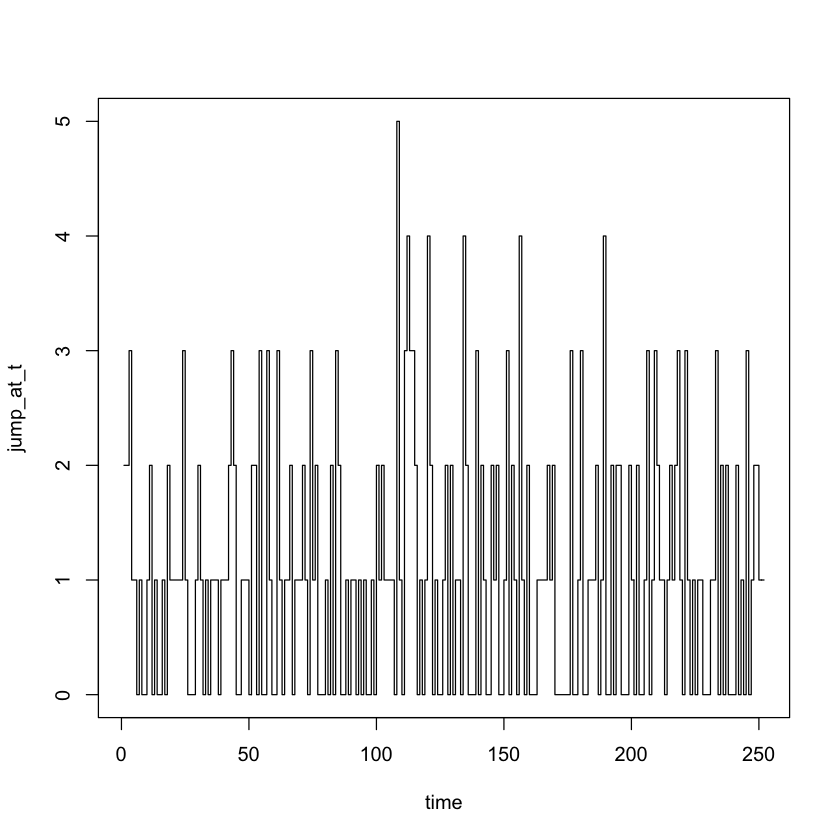

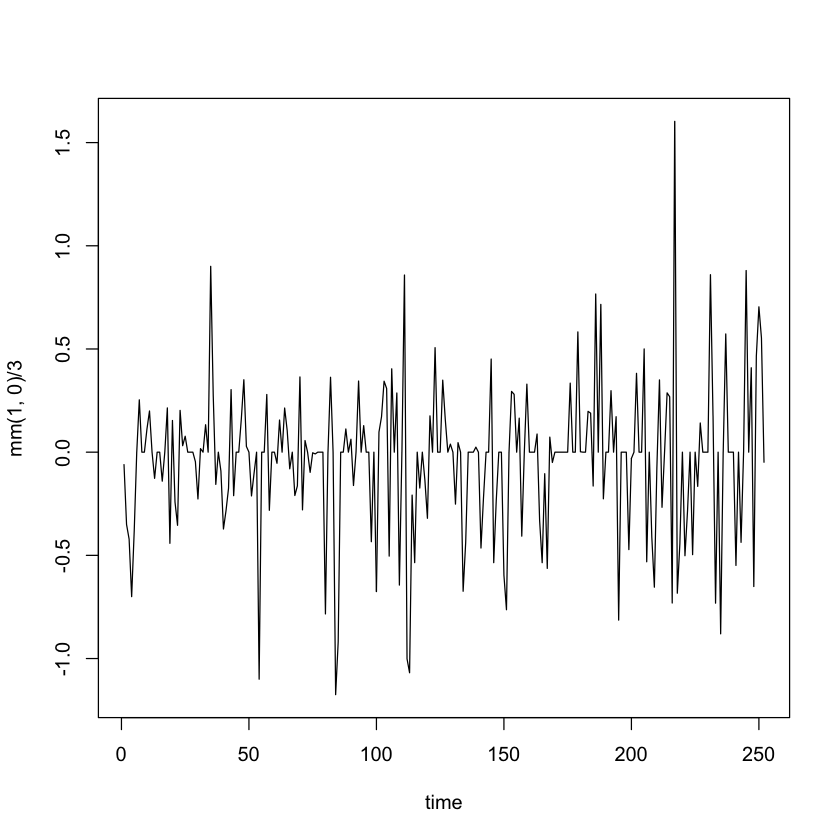

In [107]:
plot(x = time, y = mm(1, 0)/3, type = 'l')

[1] 2.313703

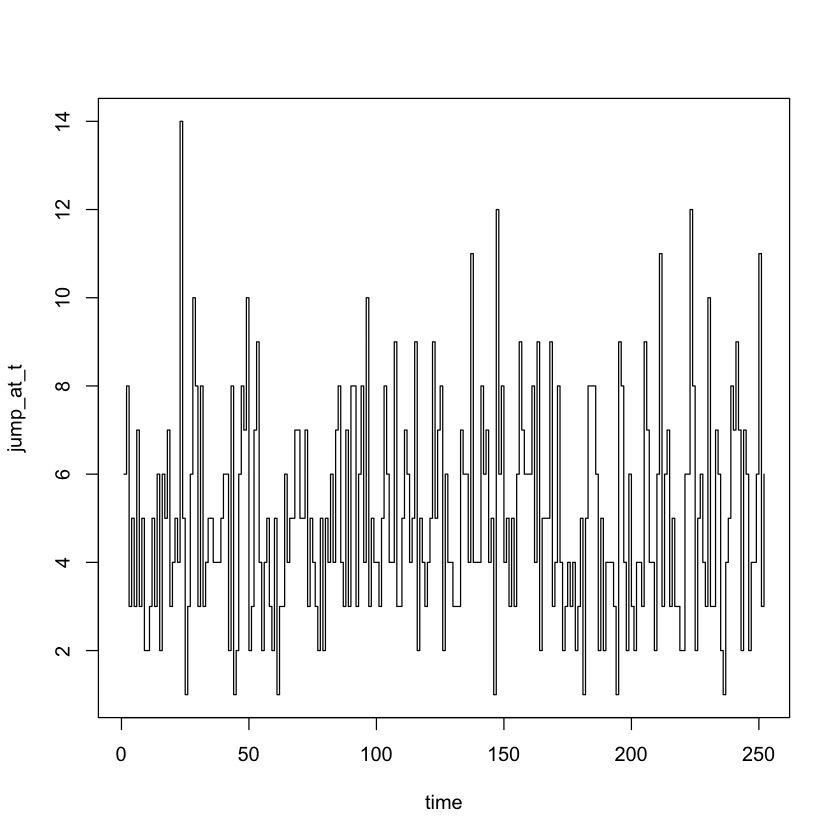

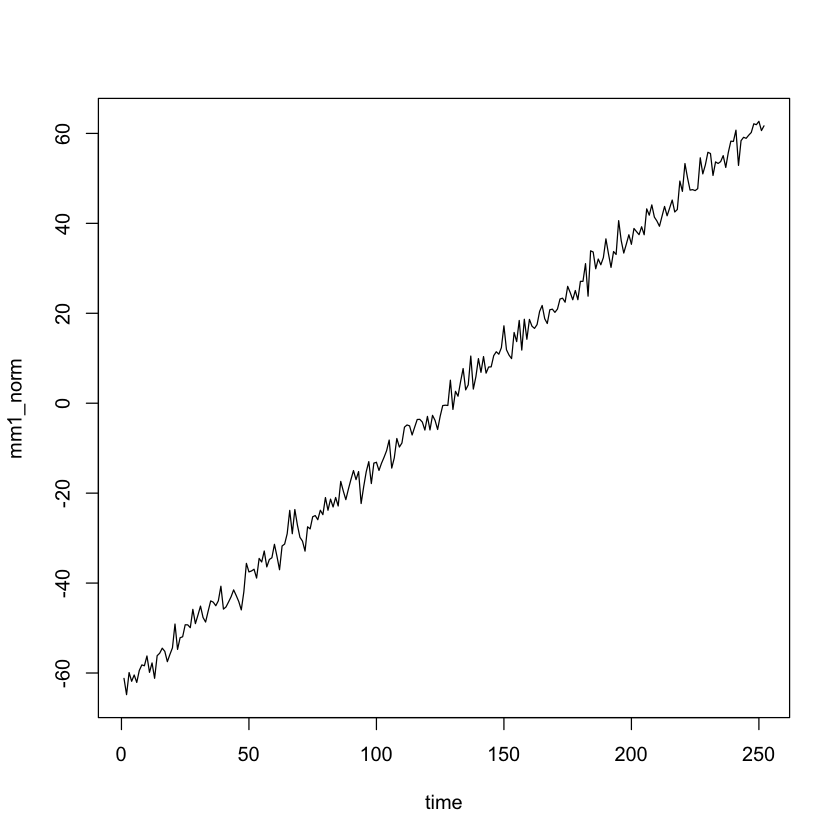

In [106]:
mm1 <- mm(5, .5) 
sd(mm1)/sqrt(length(mm1))
mm1_norm <- (mm1 - mean(mm1))
plot(x=time, y=mm1_norm, type = 'l')

In [160]:
x <- rep(0, 21)

a <- 2
for (i in 2:length(x)) {
    x[i] <- x[i-1] + pi/10 #+ rnorm(n = 1, mean = 0, sd = .1)
}
cat('last', x[21])
20*pi/10
y <- 2*sin(2+x)
nl <- nls(formula = y ~ A * sin(B + x))
plot(x = x, y = sin(x), type = 's')
lines(x = x, y = predict(nl), col = 'red')

last 6.283185

[1] 6.283185

Warning message in nls(formula = y ~ A * sin(B + x)):
“No starting values specified for some parameters.
Initializing ‘A’, ‘B’ to '1.'.
Consider specifying 'start' or using a selfStart model”

ERROR: Error in nls(formula = y ~ A * sin(B + x)): number of iterations exceeded maximum of 50


In [148]:
?nls

Warning message in nls(y ~ Const + A * exp(B * x)):
“No starting values specified for some parameters.
Initializing ‘Const’, ‘A’, ‘B’ to '1.'.
Consider specifying 'start' or using a selfStart model”


Formula: y ~ Const + A * exp(B * x)

Parameters:
       Estimate Std. Error t value Pr(>|t|)    
Const 1.000e+02  1.922e-02  5204.0   <2e-16 ***
A     1.002e+01  4.644e-02   215.8   <2e-16 ***
B     5.018e-01  4.883e-03   102.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0984 on 97 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 9.787e-07


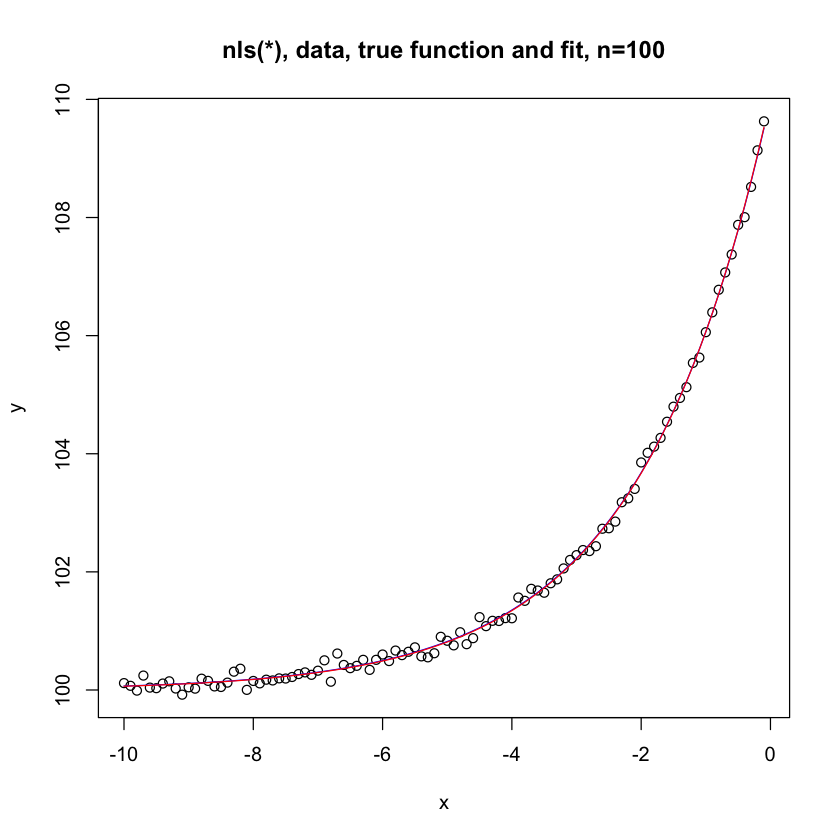

In [178]:
x <- -(1:100)/10
y1 <- 100 + 10 * exp(x / 2) + rnorm(x)/10
nlmod <- nls(y ~  Const + A * exp(B * x))

plot(x,y, main = "nls(*), data, true function and fit, n=100")
curve(100 + 10 * exp(x / 2), col = 4, add = TRUE)
lines(x, predict(nlmod), col = 2)
summary(nlmod)

Warning message in nls(y ~ sin(A * x)):
“No starting values specified for some parameters.
Initializing ‘A’ to '1.'.
Consider specifying 'start' or using a selfStart model”

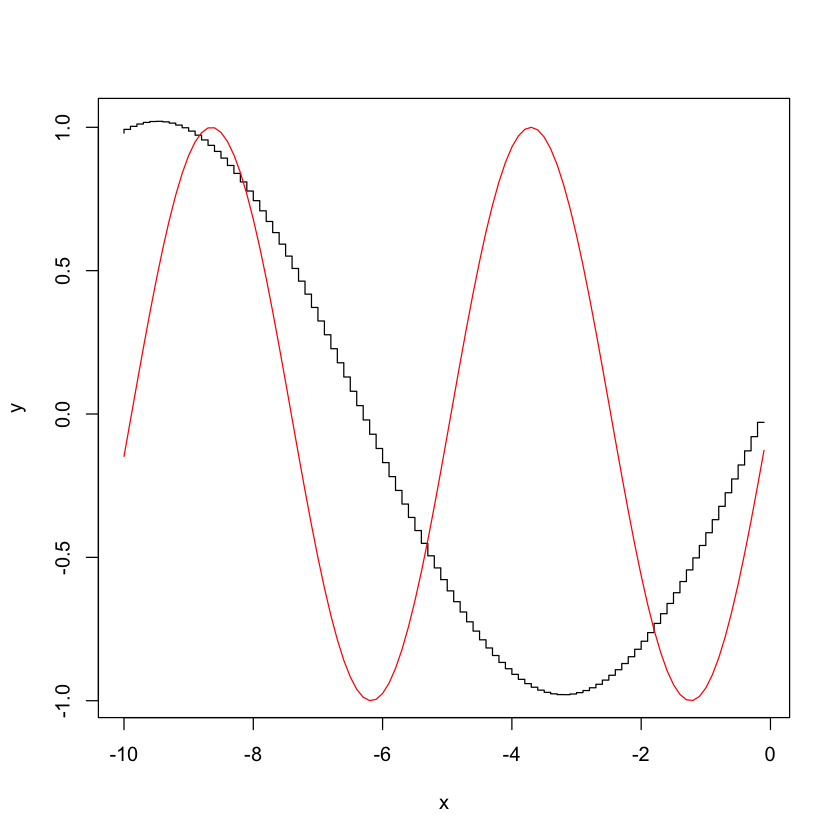

In [171]:
x <- -(1:100)/10
y2 <- 100 + 10 * exp(x / 2)